# Import Libraries here

In [12]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [9]:
data = sqlite3.connect('../data/analysis.db')
df = pd.read_sql_query("SELECT * FROM US_Analysis", data)
df

,State,1990,2000,2005,2010,2015,2016,2017,2018,2019,...,tc_loss_ha_2019,tc_loss_ha_2021,gfw_forest_carbon_gross_emissions_2005__Mg_CO2e,gfw_forest_carbon_gross_emissions_2010__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e
0,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,519846,68776,80601209.0,52559677.0,68203533.0,24281327.0,31235072.0,13307678.0,84867003.0,8589369.0
1,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,519846,68776,66638841.0,44999392.0,51306614.0,19475103.0,13627816.0,8611501.0,61970967.0,7139302.0
2,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,519846,68776,32978791.0,31999441.0,17643845.0,9078920.0,5494405.0,4556410.0,24958886.0,4939610.0
3,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,474400,64432,80601209.0,52559677.0,68203533.0,24281327.0,31235072.0,13307678.0,84867003.0,8589369.0
4,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,474400,64432,66638841.0,44999392.0,51306614.0,19475103.0,13627816.0,8611501.0,61970967.0,7139302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,West Virginia,44000.0,48400.0,46500.0,47600.0,48100.0,49000.0,48000.0,47600.0,51800.0,...,13614,11210,4395923.0,3808134.0,5175532.0,6629154.0,7411874.0,5513623.0,5586301.0,4701778.0
596,West Virginia,44000.0,48400.0,46500.0,47600.0,48100.0,49000.0,48000.0,47600.0,51800.0,...,13614,11210,4311473.0,3760839.0,5053082.0,6472369.0,7213044.0,5408502.0,5456105.0,4580390.0
597,West Virginia,44000.0,48400.0,46500.0,47600.0,48100.0,49000.0,48000.0,47600.0,51800.0,...,13132,10773,4413060.0,3815884.0,5206970.0,6671630.0,7470756.0,5544370.0,5623781.0,4730260.0
598,West Virginia,44000.0,48400.0,46500.0,47600.0,48100.0,49000.0,48000.0,47600.0,51800.0,...,13132,10773,4395923.0,3808134.0,5175532.0,6629154.0,7411874.0,5513623.0,5586301.0,4701778.0


In [13]:
selected_columns = [
    'State', '2005', '2010', '2015',  # Income columns
    'tc_loss_ha_2005', 'tc_loss_ha_2010', 'tc_loss_ha_2015',  # Deforestation columns
    'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e'  # CO₂ emissions columns
]
filtered_df = df[selected_columns].drop_duplicates()

# Calculate correlations and conduct Pearson tests for income vs. deforestation and income vs. CO₂
correlations = {}
tests = {}
for year in ['2005', '2010', '2015']:
    # Correlations
    correlations[year] = {
        'Income-Deforestation': filtered_df[year].corr(filtered_df[f'tc_loss_ha_{year}']),
        'Income-CO2': filtered_df[year].corr(filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    }
    
    # Pearson Correlation Tests
    tests[year] = {
        'Income-Deforestation': pearsonr(filtered_df[year], filtered_df[f'tc_loss_ha_{year}']),
        'Income-CO2': pearsonr(filtered_df[year], filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    }

# Display Results
print("Correlation Analysis Results:")
for year, result in correlations.items():
    print(f"\nYear: {year}")
    print(f"Income-Deforestation Correlation: {result['Income-Deforestation']:.3f}")
    print(f"Income-CO2 Correlation: {result['Income-CO2']:.3f}")

print("\nPearson Correlation Test Results:")
for year, result in tests.items():
    print(f"\nYear: {year}")
    print(f"Income-Deforestation Correlation: {result['Income-Deforestation'][0]:.3f}, P-value: {result['Income-Deforestation'][1]:.5f}")
    print(f"Income-CO2 Correlation: {result['Income-CO2'][0]:.3f}, P-value: {result['Income-CO2'][1]:.5f}")


Correlation Analysis Results:

Year: 2005
Income-Deforestation Correlation: 0.134
Income-CO2 Correlation: -0.156

Year: 2010
Income-Deforestation Correlation: 0.141
Income-CO2 Correlation: -0.213

Year: 2015
Income-Deforestation Correlation: 0.253
Income-CO2 Correlation: -0.102

Pearson Correlation Test Results:

Year: 2005
Income-Deforestation Correlation: 0.134, P-value: 0.00114
Income-CO2 Correlation: -0.156, P-value: 0.00015

Year: 2010
Income-Deforestation Correlation: 0.141, P-value: 0.00063
Income-CO2 Correlation: -0.213, P-value: 0.00000

Year: 2015
Income-Deforestation Correlation: 0.253, P-value: 0.00000
Income-CO2 Correlation: -0.102, P-value: 0.01325


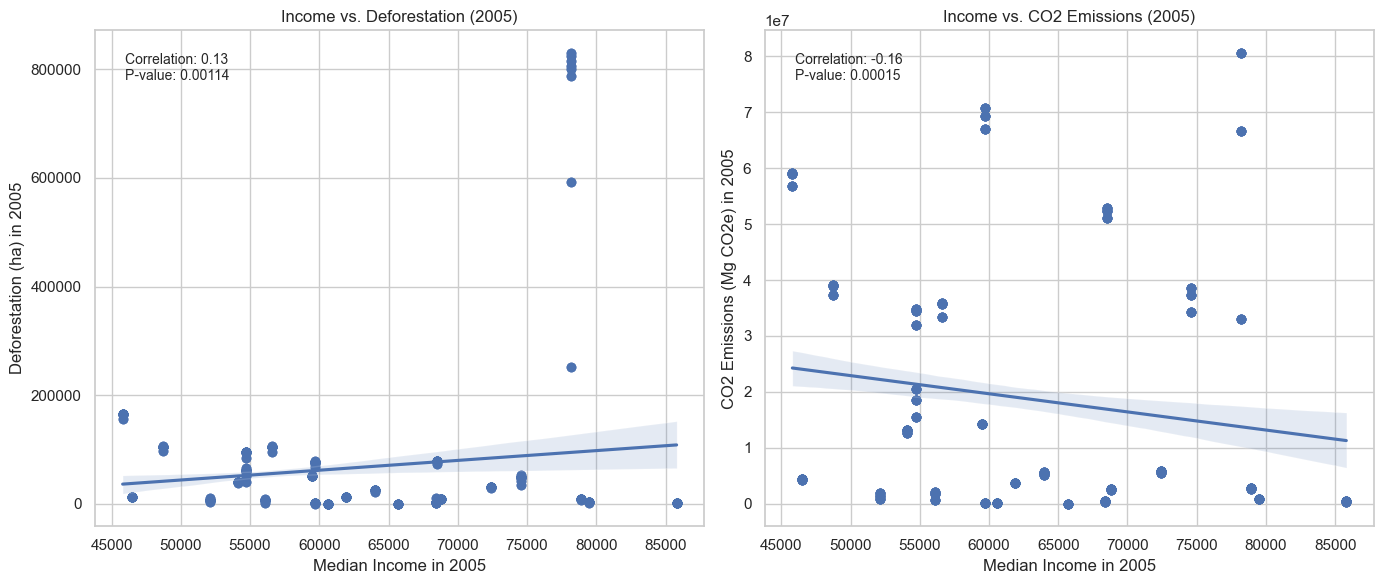

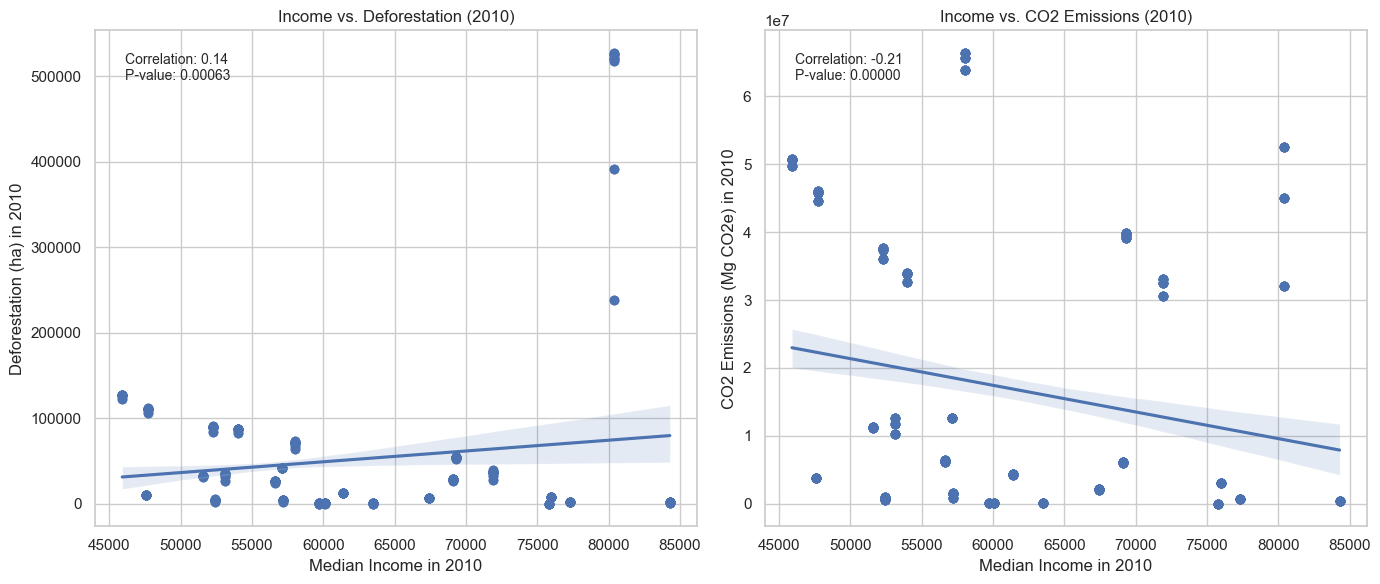

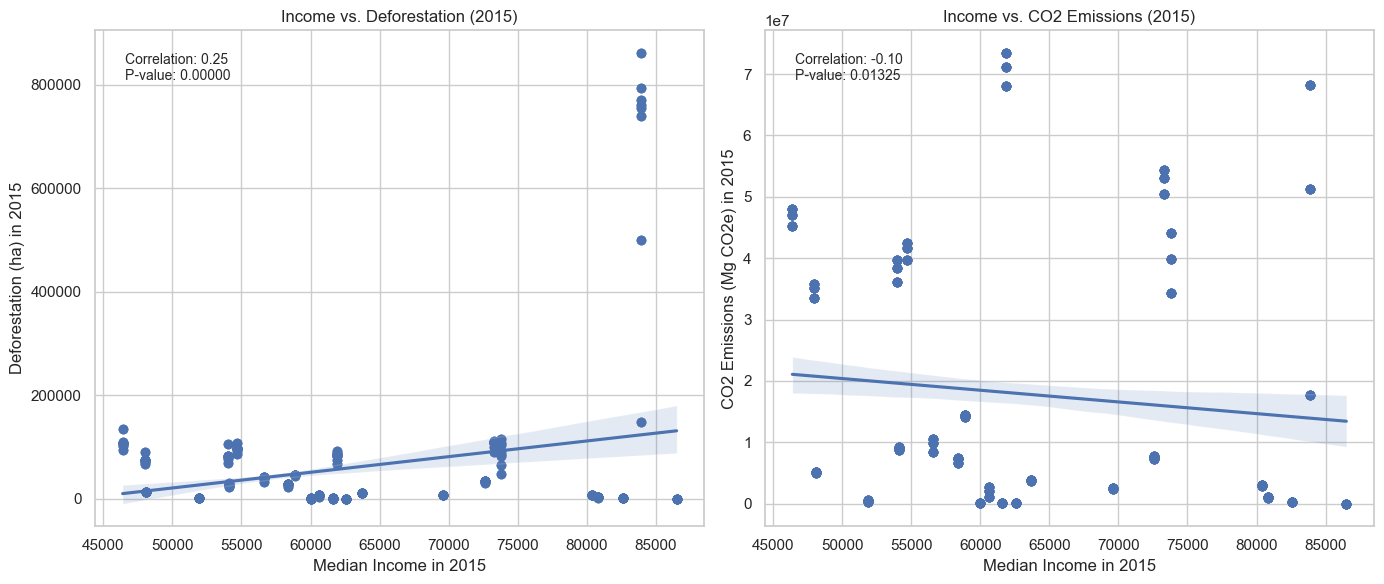

In [14]:

years = ['2005', '2010', '2015']

# Set up the plot style
sns.set(style="whitegrid")

# Plot income vs deforestation and income vs CO2 for each year
for year in years:
    plt.figure(figsize=(14, 6))

    # Scatter plot for Income vs. Deforestation
    plt.subplot(1, 2, 1)
    sns.regplot(x=filtered_df[year], y=filtered_df[f'tc_loss_ha_{year}'])
    plt.xlabel(f'Median Income in {year}')
    plt.ylabel(f'Deforestation (ha) in {year}')
    plt.title(f'Income vs. Deforestation ({year})')
    corr_income_deforestation, p_value_deforestation = pearsonr(filtered_df[year], filtered_df[f'tc_loss_ha_{year}'])
    plt.annotate(f"Correlation: {corr_income_deforestation:.2f}\nP-value: {p_value_deforestation:.5f}", 
                 xy=(0.05, 0.9), xycoords="axes fraction", fontsize=10)

    # Scatter plot for Income vs. CO2
    plt.subplot(1, 2, 2)
    sns.regplot(x=filtered_df[year], y=filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    plt.xlabel(f'Median Income in {year}')
    plt.ylabel(f'CO2 Emissions (Mg CO2e) in {year}')
    plt.title(f'Income vs. CO2 Emissions ({year})')
    corr_income_co2, p_value_co2 = pearsonr(filtered_df[year], filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    plt.annotate(f"Correlation: {corr_income_co2:.2f}\nP-value: {p_value_co2:.5f}", 
                 xy=(0.05, 0.9), xycoords="axes fraction", fontsize=10)

    plt.tight_layout()
    plt.show()

In [20]:
filtered_df

,2005,2010,2015,tc_loss_ha_2005,tc_loss_ha_2010,tc_loss_ha_2015,gfw_forest_carbon_gross_emissions_2005__Mg_CO2e,gfw_forest_carbon_gross_emissions_2010__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e
0,78200.0,80400.0,83900.0,830242,527452,861433,80601209.0,52559677.0,68203533.0
1,78200.0,80400.0,83900.0,830242,527452,861433,66638841.0,44999392.0,51306614.0
2,78200.0,80400.0,83900.0,830242,527452,861433,32978791.0,31999441.0,17643845.0
3,78200.0,80400.0,83900.0,824764,526024,794112,80601209.0,52559677.0,68203533.0
4,78200.0,80400.0,83900.0,824764,526024,794112,66638841.0,44999392.0,51306614.0
...,...,...,...,...,...,...,...,...,...
595,46500.0,47600.0,48100.0,12495,10435,13370,4395923.0,3808134.0,5175532.0
596,46500.0,47600.0,48100.0,12495,10435,13370,4311473.0,3760839.0,5053082.0
597,46500.0,47600.0,48100.0,12119,10235,12872,4413060.0,3815884.0,5206970.0
598,46500.0,47600.0,48100.0,12119,10235,12872,4395923.0,3808134.0,5175532.0


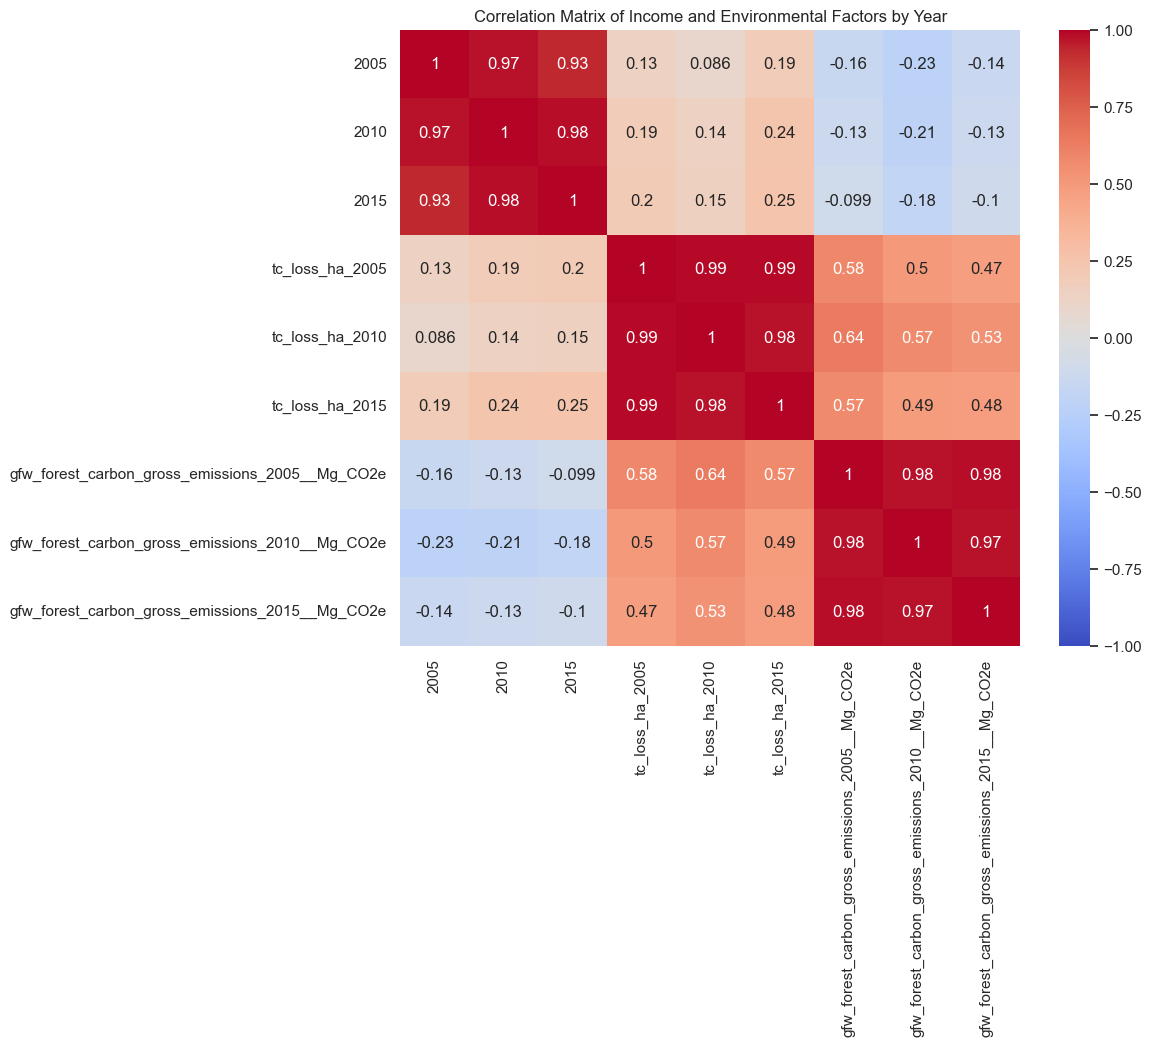

KeyError: 'Income_2005'

<Figure size 1400x600 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = filtered_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Income and Environmental Factors by Year')
plt.show()

# Joint Plot for Income vs. Deforestation and Income vs. CO2
years = ['2005', '2010', '2015']
for year in years:
    plt.figure(figsize=(14, 6))
    
    # Joint Plot for Income vs Deforestation
    sns.jointplot(
        x=filtered_df[f'Income_{year}'], y=filtered_df[f'Deforestation_{year}'],
        kind='reg', height=6, color='skyblue',
        marginal_kws=dict(bins=15, fill=True)
    )
    plt.suptitle(f'Income vs. Deforestation ({year})', y=1.02)
    
    # Joint Plot for Income vs CO2
    sns.jointplot(
        x=filtered_df[f'Income_{year}'], y=filtered_df[f'CO2_{year}'],
        kind='reg', height=6, color='coral',
        marginal_kws=dict(bins=15, fill=True)
    )
    plt.suptitle(f'Income vs. CO2 Emissions ({year})', y=1.02)
    
plt.show()